In [1]:
import pandas as pd # data manipulation
import numpy as np # funciones matemáticas

#viz
import matplotlib.pyplot as plt
import seaborn as sns

#statistics
from scipy.stats import shapiro
import scipy.stats as stats

# Improving the plot to read the y axis for full number
from matplotlib.ticker import FuncFormatter

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [2]:
df = pd.read_csv("marketing.csv")
df.shape

(308, 11)

In [3]:
df.head()

,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0
1,2,2021-02-01,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962.0
2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0
3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0


In [4]:
df.dtypes

id                 int64
c_date            object
campaign_name     object
category          object
campaign_id        int64
impressions        int64
mark_spent       float64
clicks             int64
leads              int64
orders             int64
revenue          float64
dtype: object

In [5]:
df["campaign_name"].value_counts()

campaign_name
facebook_tier1          28
facebOOK_tier2          28
google_hot              28
google_wide             28
youtube_blogger         28
instagram_tier1         28
instagram_tier2         28
facebook_retargeting    28
facebook_lal            28
instagram_blogger       28
banner_partner          28
Name: count, dtype: int64

In [6]:
#cleaning campaign data
df["campaign_name"] = df["campaign_name"].replace('facebOOK_tier2', 'facebook_tier2', regex=True)

In [7]:
df.isnull().sum()

id               0
c_date           0
campaign_name    0
category         0
campaign_id      0
impressions      0
mark_spent       0
clicks           0
leads            0
orders           0
revenue          0
dtype: int64

In [8]:
# Use a lambda function and apply to calculate profit or loss
df['profit_or_loss'] = df.apply(lambda row: row['revenue'] - row['mark_spent'], axis=1)
df['profit_or_loss']

0      -2326.37
1      -1338.20
2       2759.40
3      -3923.00
4      54527.80
         ...   
303     -760.75
304     -224.81
305    -5353.80
306      162.35
307      207.38
Name: profit_or_loss, Length: 308, dtype: float64

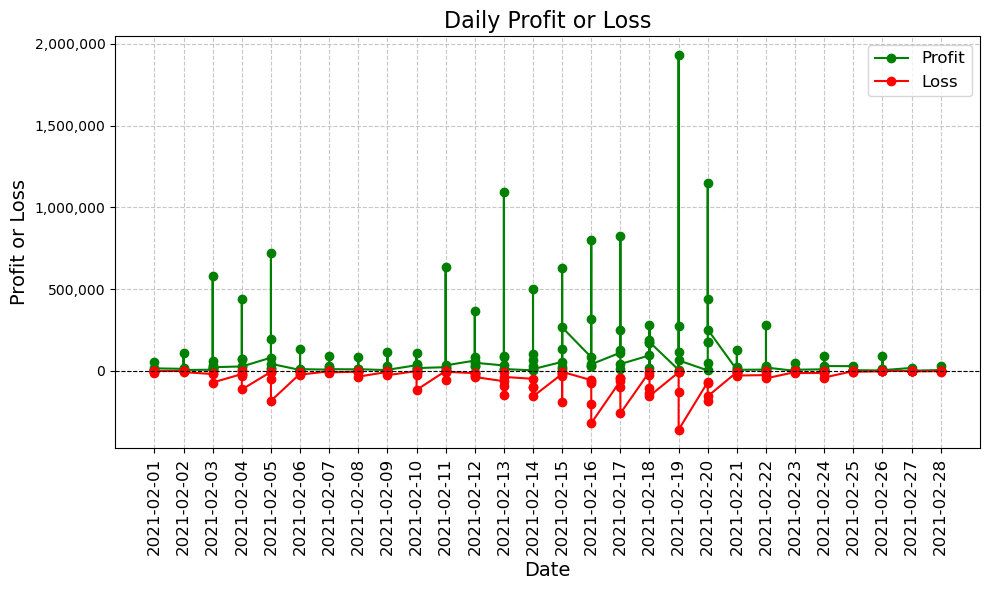

In [9]:
# Plot a line graph to show profit and loss from marketing expense
plt.figure(figsize=(10, 6))

# Separate profit and loss
profit = df['profit_or_loss'] > 0
loss = df['profit_or_loss'] <= 0

# Plot profit and loss
plt.plot(df['c_date'][profit], df['profit_or_loss'][profit], marker='o', linestyle='-', color='green', label='Profit')
plt.plot(df['c_date'][loss], df['profit_or_loss'][loss], marker='o', linestyle='-', color='red', label='Loss')

# Add zero line for differentitaion of profit and loss
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# expand y-axis to show full numbers with commas
ax = plt.gca()  # Get current axes
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

#Customzing table details
plt.title('Daily Profit or Loss', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Profit or Loss', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [10]:
#extracted from one of the queries in SQL
#campaigns per category which break even (revenue larger than expense) 
df_break = pd.read_csv("breakeven_rev_exp.csv")
df_break.head()

,campaign_name,category,mark_spent,revenue
0,banner_partner,media,46159.80,51753
1,google_hot,search,5221.60,7981
2,instagram_tier1,social,9540.01,17943
3,youtube_blogger,influencer,29962.20,84490


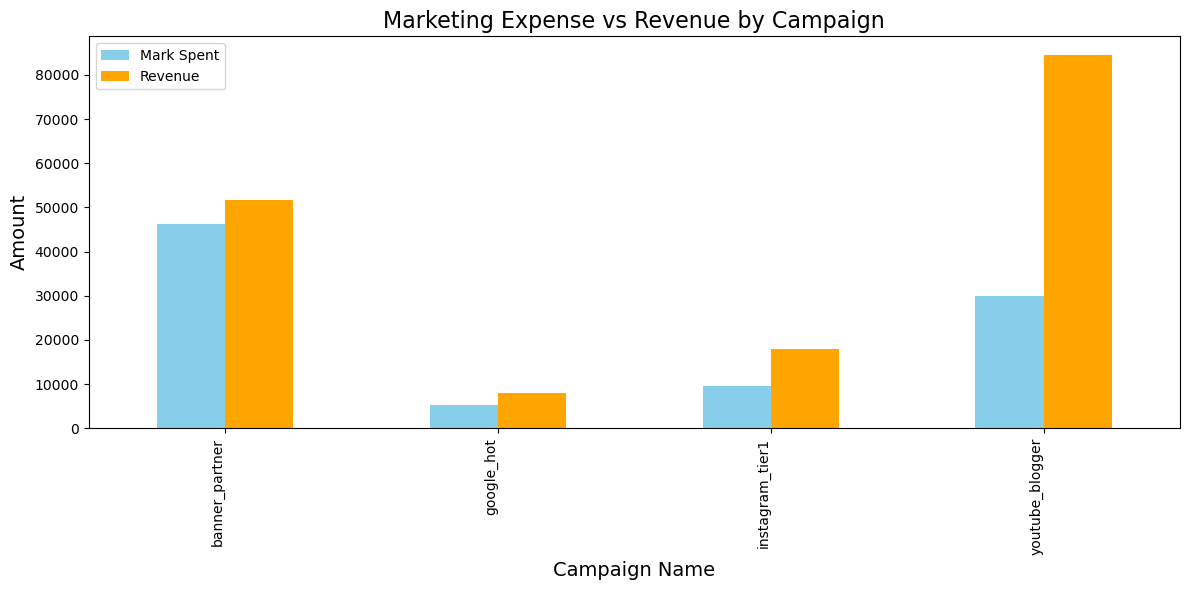

In [11]:
#plot a bar graph for campaigns which breakeven
df_break.set_index('campaign_name')[['mark_spent', 'revenue']].plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
#customizing the graph
plt.title('Marketing Expense vs Revenue by Campaign', fontsize=16)
plt.xlabel('Campaign Name', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.legend(['Mark Spent', 'Revenue'])
plt.tight_layout()
plt.show()

In [12]:
#Return on investment of marketing expense= Total earning (Revenue) - Marketing cost ) / Marketing cost
# Calculate ROI
df['ROI'] = df.apply(lambda row: (row['revenue'] - row['mark_spent']) / row['mark_spent'], axis=1)
df[['campaign_name', 'revenue', 'mark_spent', 'ROI']]

,campaign_name,revenue,mark_spent,ROI
0,facebook_tier1,4981.0,7307.37,-0.318359
1,facebook_tier2,14962.0,16300.20,-0.082097
2,google_hot,7981.0,5221.60,0.528459
3,google_wide,2114.0,6037.00,-0.649826
4,youtube_blogger,84490.0,29962.20,1.819886
...,...,...,...,...
303,instagram_tier2,0.0,760.75,-1.000000
304,facebook_retargeting,0.0,224.81,-1.000000
305,facebook_lal,1491.0,6844.80,-0.782170
306,instagram_blogger,5008.0,4845.65,0.033504


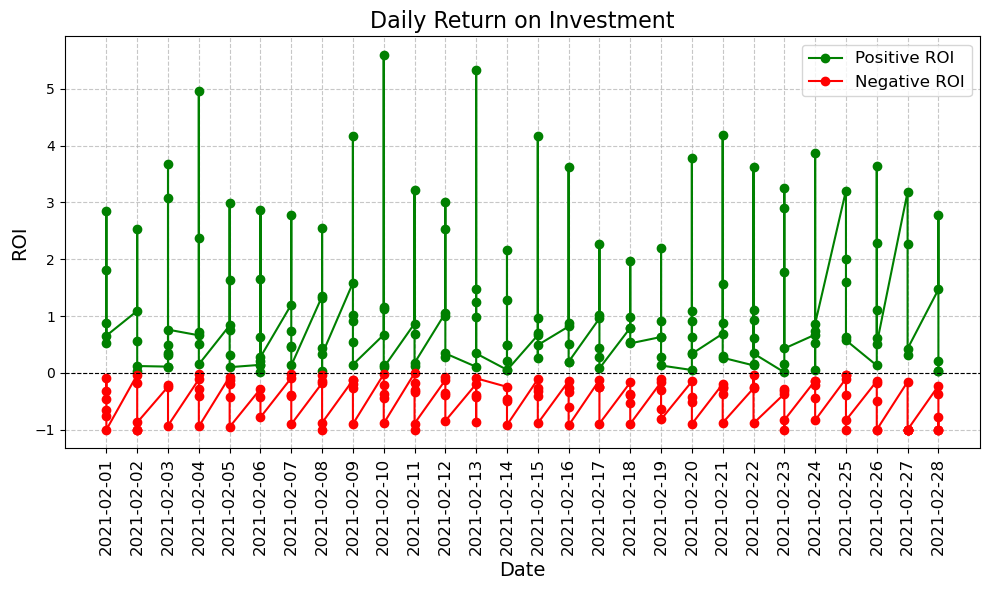

In [13]:
# Plot a line graph to show profit and loss from marketing expense
plt.figure(figsize=(10, 6))

# Separate positive and negative return on investment
positive = df['ROI'] > 0
negative = df['ROI'] <= 0

# Plot profit and loss 
plt.plot(df['c_date'][positive], df['ROI'][profit], marker='o', linestyle='-', color='green', label='Positive ROI')
plt.plot(df['c_date'][negative], df['ROI'][loss], marker='o', linestyle='-', color='red', label='Negative ROI')

# Add zero line for differentitaion of profit and loss
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

plt.title('Daily Return on Investment', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('ROI', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

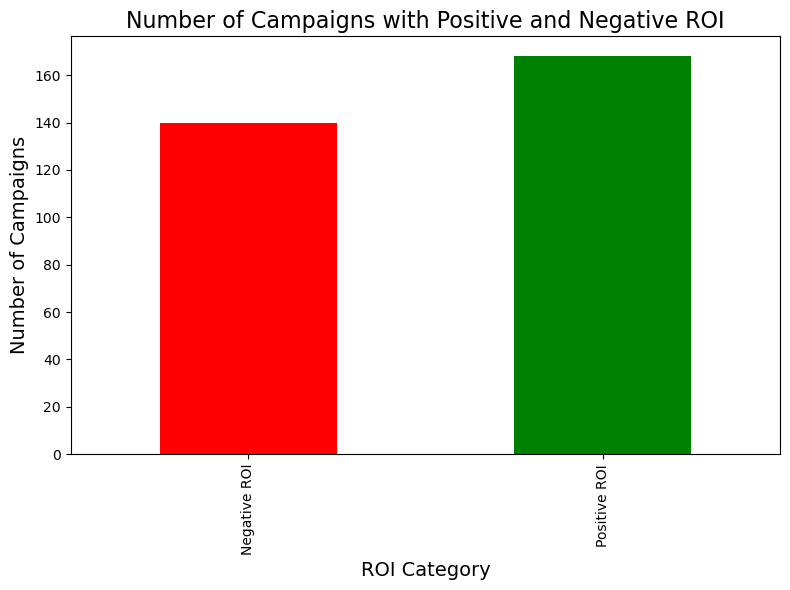

In [14]:
#Plot the number of campaigns with positive and negative ROI
# groupby campaigns by ROI positive and negative
roi_positive = df.groupby(df['ROI'] > 0)['campaign_name'].count()

# renaming positive and negative
roi_positive.index = ['Negative ROI', 'Positive ROI']

# Plot roi
plt.figure(figsize=(8, 6))
roi_positive.plot(kind='bar', color=['red', 'green'])

# customize plot info
plt.title('Number of Campaigns with Positive and Negative ROI', fontsize=16)
plt.xlabel('ROI Category', fontsize=14)
plt.ylabel('Number of Campaigns', fontsize=14)
plt.tight_layout()
plt.show()


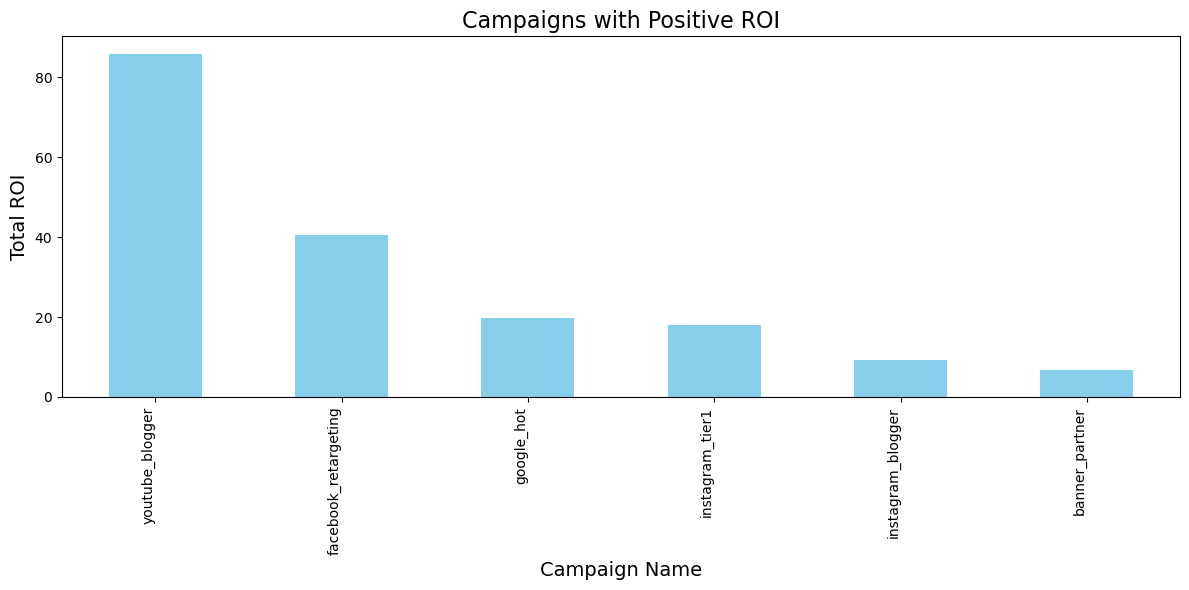

In [15]:
#Plot ROI per campaign 
#create a groupby campaign of positive ROI
roi_campaigns = df.groupby('campaign_name')['ROI'].sum().sort_values(ascending=False)

# Filter campaigns with positive ROI
positive_roi_campaigns = roi_campaigns[roi_campaigns > 0]

#plot bar graph with customization
plt.figure(figsize=(12, 6))
positive_roi_campaigns.plot(kind='bar', color='skyblue')
plt.title('Campaigns with Positive ROI', fontsize=16)
plt.xlabel('Campaign Name', fontsize=14)
plt.ylabel('Total ROI', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [16]:
roi_campaigns

campaign_name
youtube_blogger         85.923612
facebook_retargeting    40.607354
google_hot              19.842293
instagram_tier1         18.085782
instagram_blogger        9.278587
banner_partner           6.783295
facebook_tier1          -1.858525
facebook_tier2          -8.143735
google_wide             -9.123125
instagram_tier2        -11.186032
facebook_lal           -24.665148
Name: ROI, dtype: float64

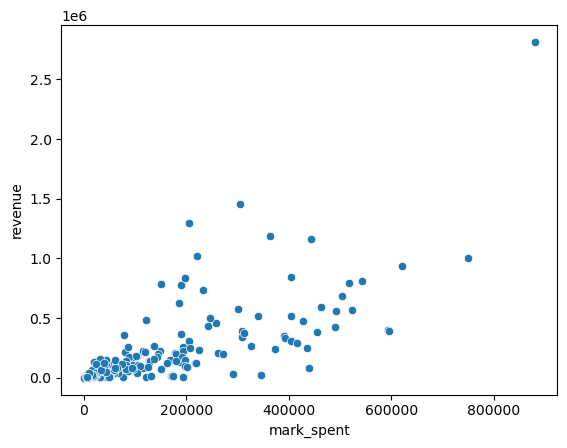

In [17]:
# Plotting a scatter plot to visualize the relationship between marketing expenditure and revenue
sns.scatterplot(data=df, x='mark_spent', y='revenue')
plt.show()

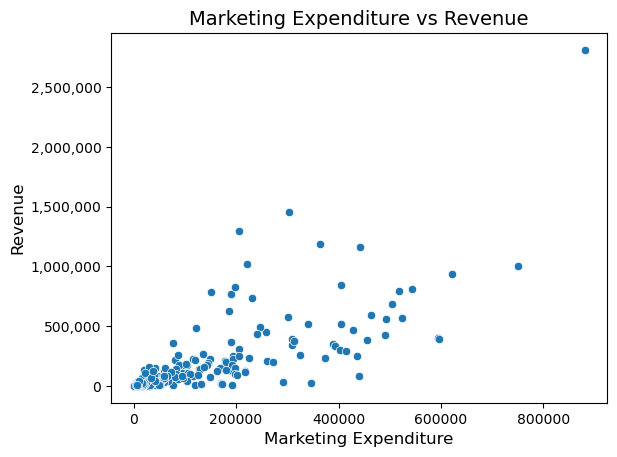

In [18]:
# Improving the plot to read the y axis for full number
from matplotlib.ticker import FuncFormatter

sns.scatterplot(data=df, x='mark_spent', y='revenue')

# force full numbers on the y-axis
ax = plt.gca()  # get current axes
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))  # format as full numbers with commas

# customizing labels and title
plt.xlabel('Marketing Expenditure', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.title('Marketing Expenditure vs Revenue', fontsize=14)
plt.show()


In [19]:
# Get the campaign with the highest number of clicks
highest_clicks_campaign = df.loc[df['clicks'].idxmax()]
highest_clicks_campaign

id                            216
c_date                 2021-02-20
campaign_name     instagram_tier2
category                   social
campaign_id                983498
impressions              12239000
mark_spent               150065.0
clicks                      61195
leads                        1224
orders                         48
revenue                   73392.0
profit_or_loss           -76673.0
ROI                     -0.510932
Name: 215, dtype: object

In [20]:
# Group by category and find the campaign with the highest clicks within each category
highest_clicks_by_category = df.loc[df.groupby('category')['clicks'].idxmax()]
highest_clicks_by_category = highest_clicks_by_category.sort_values(by='clicks', ascending=False)
highest_clicks_by_category[['category', 'campaign_name', 'clicks']]


,category,campaign_name,clicks
215,social,instagram_tier2,61195
213,influencer,youtube_blogger,53993
219,media,banner_partner,50408
212,search,google_wide,28810


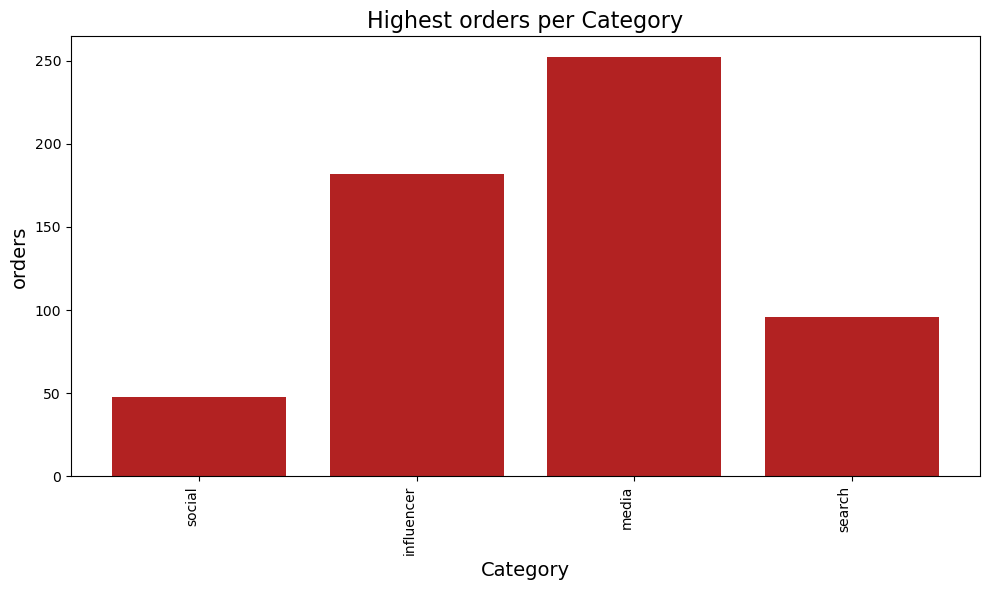

In [21]:
# Plot highest orders per category
plt.figure(figsize=(10, 6))
plt.bar(highest_clicks_by_category['category'], highest_clicks_by_category['orders'], color='firebrick')
#customize lables
plt.title('Highest orders per Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('orders', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# top 10 campaigns by orders
top_10_clicks_campaigns = df.nlargest(10, 'orders')
top_10_clicks_campaigns_filtered = top_10_clicks_campaigns[['campaign_name', 'orders']]
top_10_clicks_campaigns_filtered

,campaign_name,orders
202,youtube_blogger,369
219,banner_partner,252
213,youtube_blogger,182
164,banner_partner,171
174,instagram_blogger,160
136,youtube_blogger,158
180,youtube_blogger,149
48,youtube_blogger,146
186,banner_partner,142
208,banner_partner,139


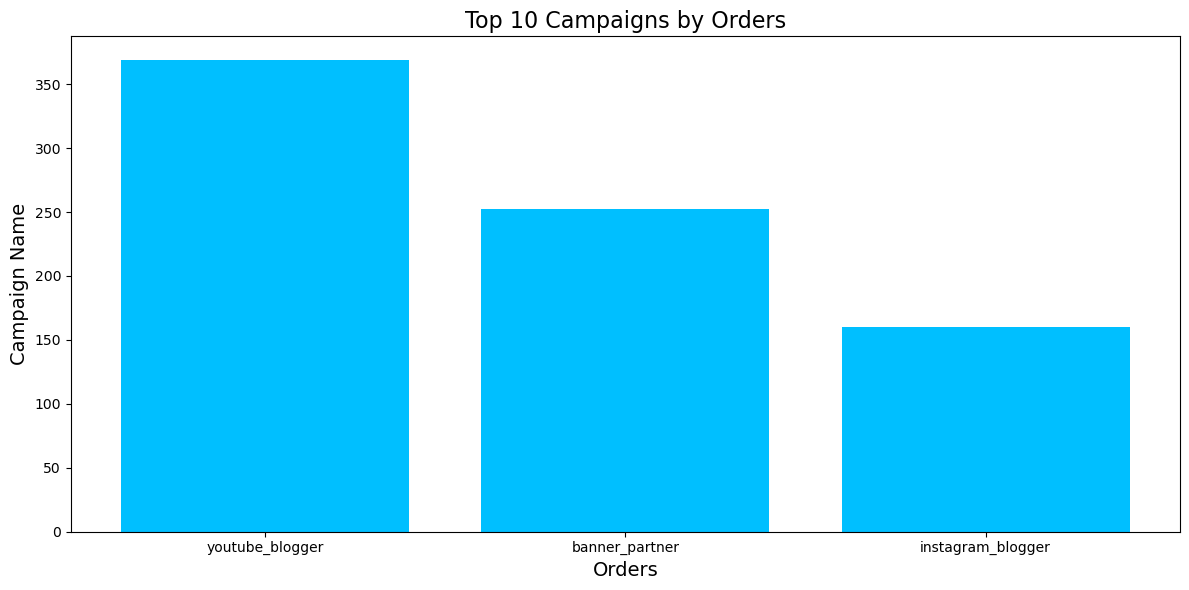

In [23]:
# Plot top 10 campaigns
plt.figure(figsize=(12, 6))
plt.bar(top_10_clicks_campaigns_filtered['campaign_name'], top_10_clicks_campaigns_filtered['orders'], color='deepskyblue')

# customize labels
plt.title('Top 10 Campaigns by Orders', fontsize=16)
plt.xlabel('Orders', fontsize=14)
plt.ylabel('Campaign Name', fontsize=14)
plt.tight_layout()
plt.show()

In [24]:
#Calculating conversion: conversion rate from leads to sales (Orders/Leads)
df['conversion_rate'] = round(df.apply(lambda row: row['orders'] / row['leads'] if row['leads'] != 0 else 0, axis=1),4)
df[['campaign_name', 'orders', 'leads', 'conversion_rate']]

,campaign_name,orders,leads,conversion_rate
0,facebook_tier1,1,13,0.0769
1,facebook_tier2,3,48,0.0625
2,google_hot,1,9,0.1111
3,google_wide,1,24,0.0417
4,youtube_blogger,10,49,0.2041
...,...,...,...,...
303,instagram_tier2,0,4,0.0000
304,facebook_retargeting,0,0,0.0000
305,facebook_lal,1,5,0.2000
306,instagram_blogger,1,12,0.0833


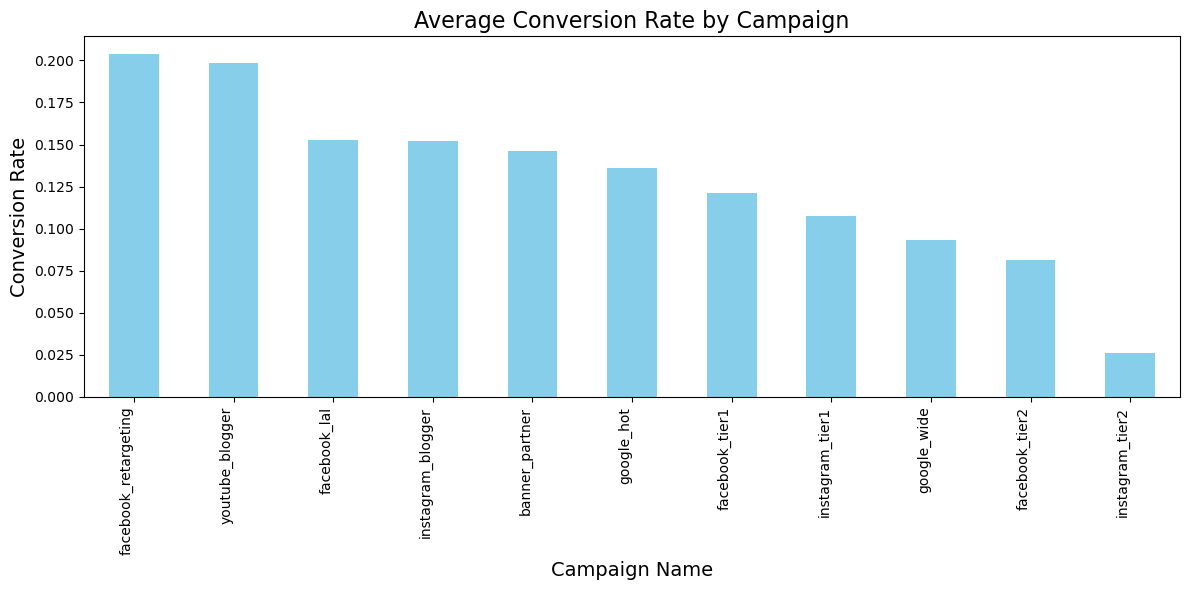

In [25]:
#Plot conversion rate per campagin 
# group by campaign and calculate the average conversion rate for each campaign
conversion_camp = df.groupby('campaign_name')['conversion_rate'].mean().sort_values(ascending=False)

# Plot conversion rate per camp and custmoize
plt.figure(figsize=(12, 6))
conversion_camp.plot(kind='bar', color='skyblue')
plt.title('Average Conversion Rate by Campaign', fontsize=16)
plt.xlabel('Campaign Name', fontsize=14)
plt.ylabel('Conversion Rate', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

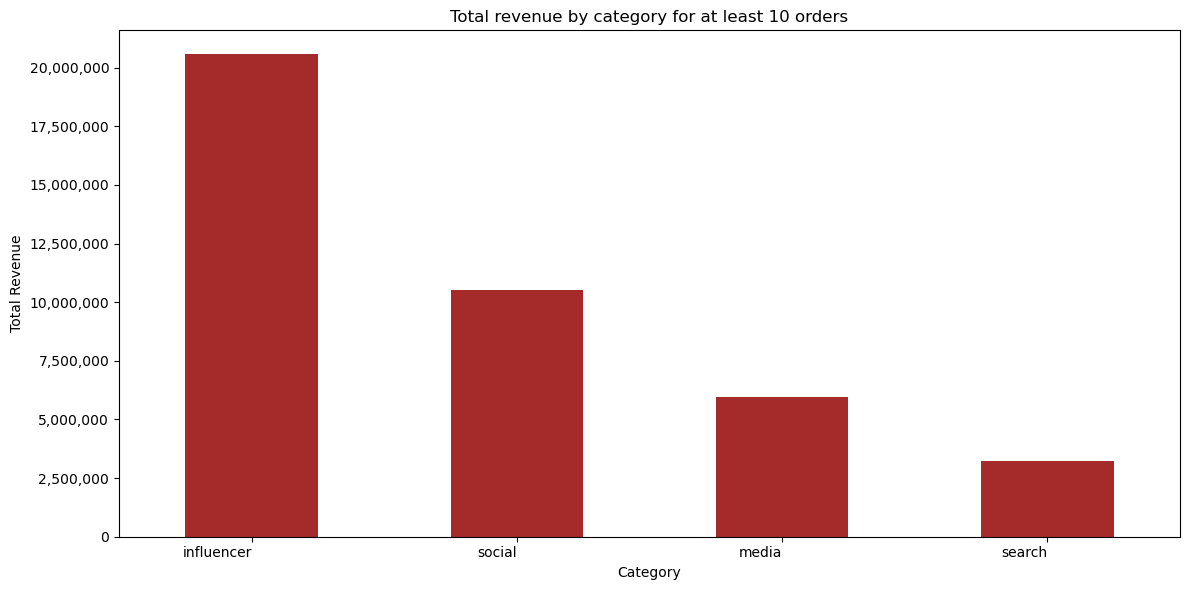

In [26]:
#Barplot for revenue sold per category shoes for orders of at least 10
filtered_cate = df[df['orders'] > 10]

# calculate total revenue per category and sort
cate_rev = filtered_cate.groupby('category')['revenue'].sum().sort_values(ascending=False)

#plot the bar graph and expand the y axis for better readability
plt.figure(figsize=(12, 6))
ax = cate_rev.plot(kind='bar', color='brown')  # assign y-axe to ax

# expand numbers on the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format with commas

#customize info
plt.title('Total revenue by category for at least 10 orders')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

In [27]:
# use option to show numbers in standard decimal format
pd.set_option('display.float_format', '{:,.2f}'.format)  
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,308.00,154.50,89.06,1.00,77.75,154.50,231.25,308.00
campaign_id,308.00,"9,605,628.27","25,430,400.29","10,934.00","127,823.00","374,754.00","4,387,490.00","89,459,845.00"
impressions,308.00,"5,122,475.32","26,311,343.52",667.00,"147,956.75","602,810.00","3,254,450.00","419,970,000.00"
mark_spent,308.00,"99,321.04","144,008.01",169.75,"9,465.19","36,765.15","129,372.25","880,357.00"
clicks,308.00,"9,740.00","12,157.48",20.00,"1,347.25","4,349.50","13,499.25","61,195.00"
leads,308.00,212.92,300.46,0.00,20.75,84.00,270.50,"1,678.00"
orders,308.00,26.11,42.74,0.00,3.00,9.00,29.25,369.00
revenue,308.00,"139,251.19","276,303.11",0.00,"8,580.00","38,917.00","137,049.25","2,812,520.00"
profit_or_loss,308.00,"39,930.15","191,400.12","-360,030.00","-6,239.92","2,162.27","26,811.28","1,932,163.00"
ROI,308.00,0.41,1.22,-1.00,-0.32,0.11,0.76,5.59


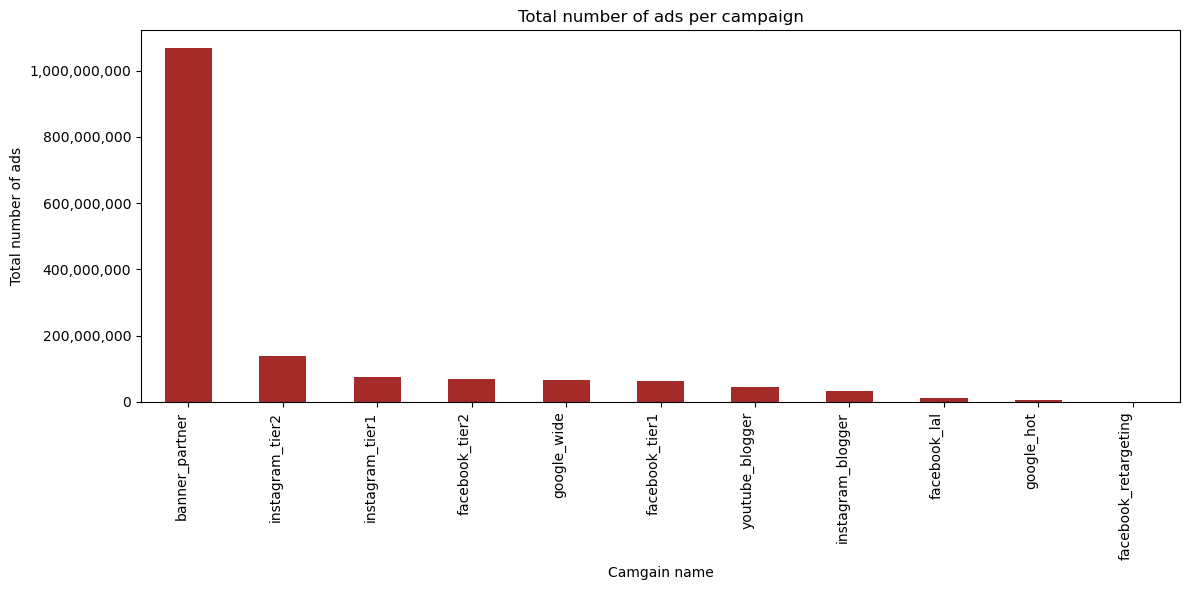

In [28]:
#Barplot for total number of ads per campaign
ads_camp = df.groupby('campaign_name')['impressions'].sum().sort_values(ascending=False)

#plot the bar graph and expand the y axis for better readability
plt.figure(figsize=(12, 6))
ax = ads_camp.plot(kind='bar', color='brown')  # assign y-axe to ax

# expand numbers on the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format with commas

plt.title('Total number of ads per campaign')
plt.xlabel('Camgain name')
plt.ylabel('Total number of ads')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [29]:
#create a frequency table for campaign per category
crosstab_result = pd.crosstab(df['category'], df['campaign_name'])
crosstab_result

campaign_name,banner_partner,facebook_lal,facebook_retargeting,facebook_tier1,facebook_tier2,google_hot,google_wide,instagram_blogger,instagram_tier1,instagram_tier2,youtube_blogger
category,,,,,,,,,,,
influencer,0,0,0,0,0,0,0,28,0,0,28
media,28,0,0,0,0,0,0,0,0,0,0
search,0,0,0,0,0,28,28,0,0,0,0
social,0,28,28,28,28,0,0,0,28,28,0


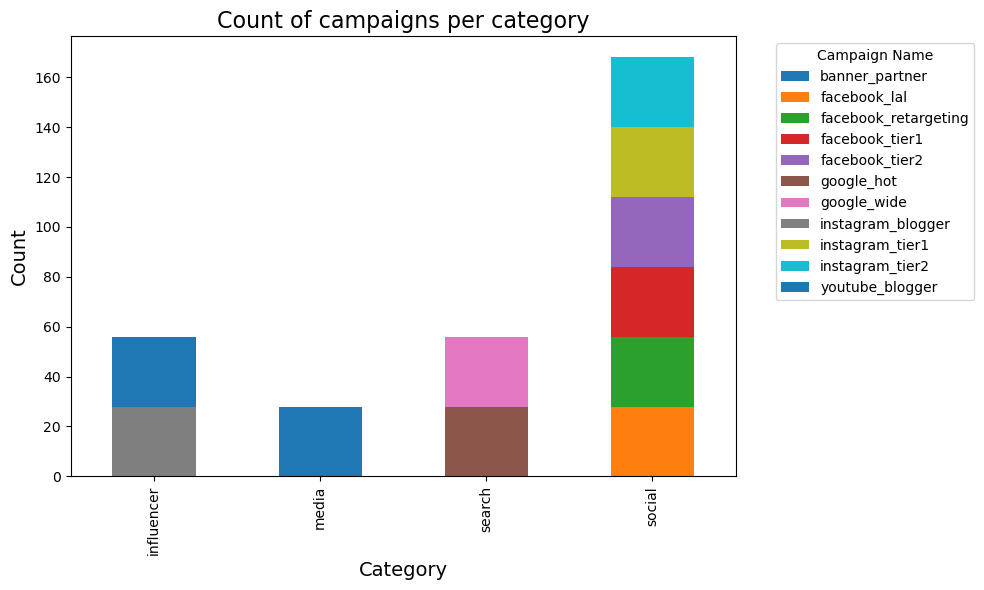

In [30]:
#plot crosstabe as stacked bar graph to show the frequency of campaings per category
# stacked bar chart shows the equal allocation of campains among each category
ax = crosstab_result.plot(kind='bar', stacked=True, figsize=(10, 6))

# legend outside the plot and customization
plt.legend(title='Campaign Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Count of campaigns per category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

In [31]:
#defining the categorical and numercial datas
df = df.drop(columns=["id"])

# General Selection
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

# Being specific
cat_from_num = num.loc[:, num.nunique() < 20] # how does loc work Vs iloc
cat = pd.concat([cat, cat_from_num], axis=1)

num = num.drop(columns=cat_from_num.columns)

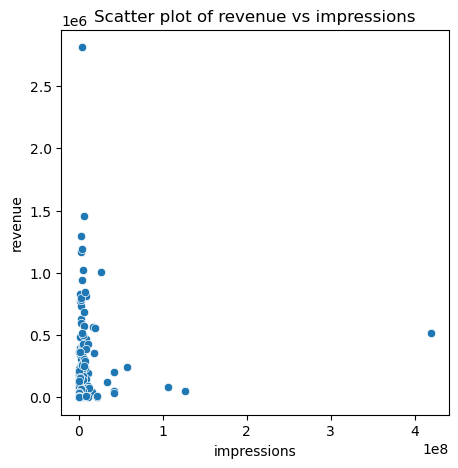

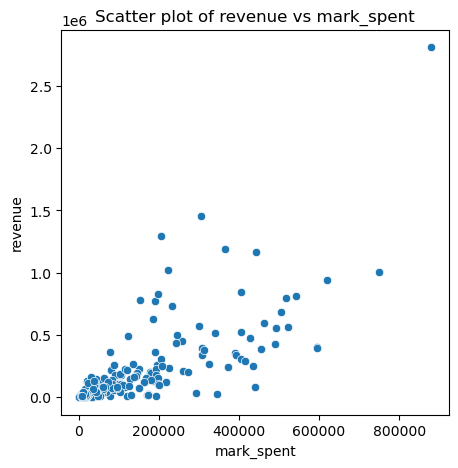

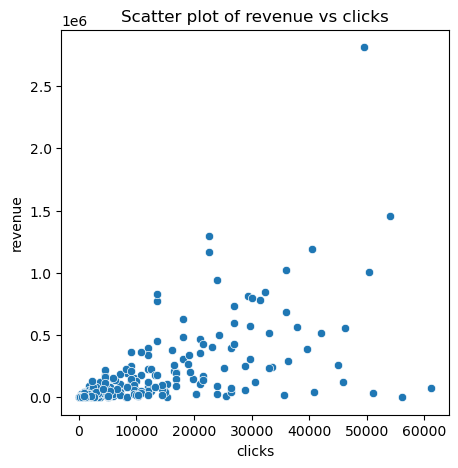

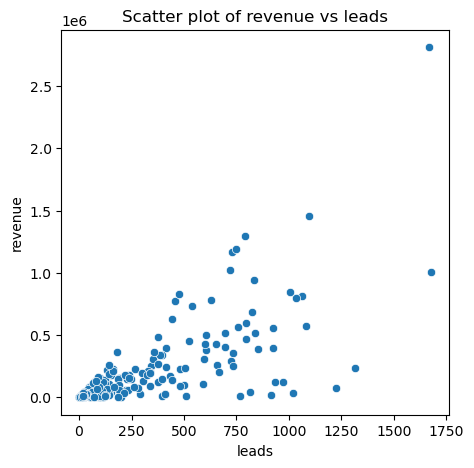

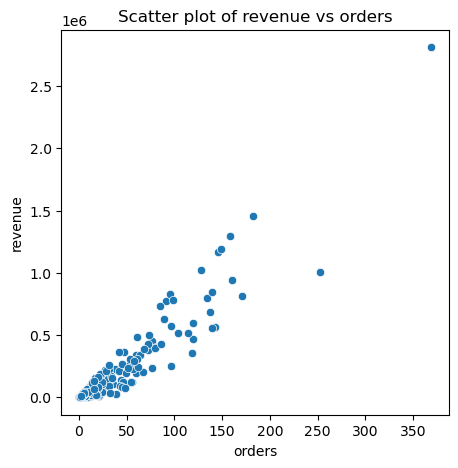

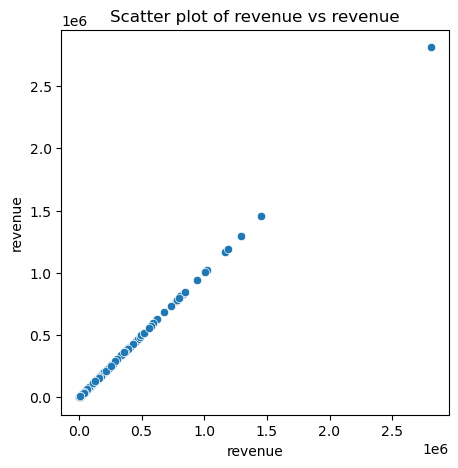

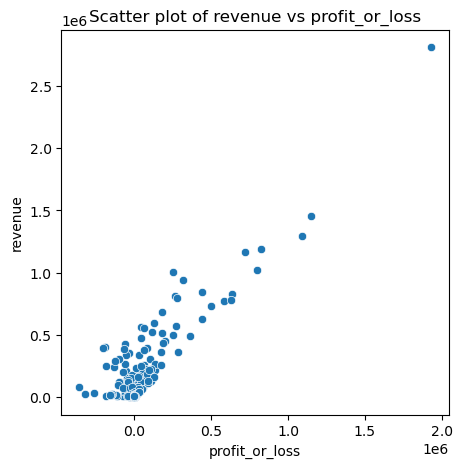

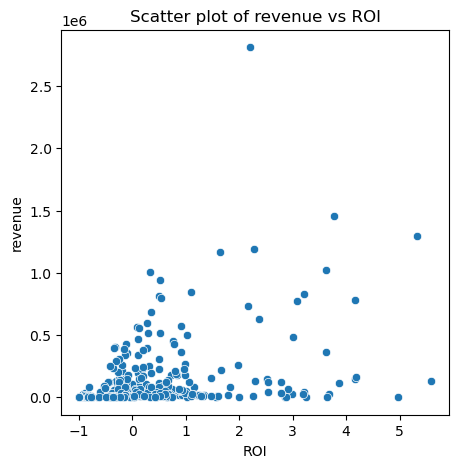

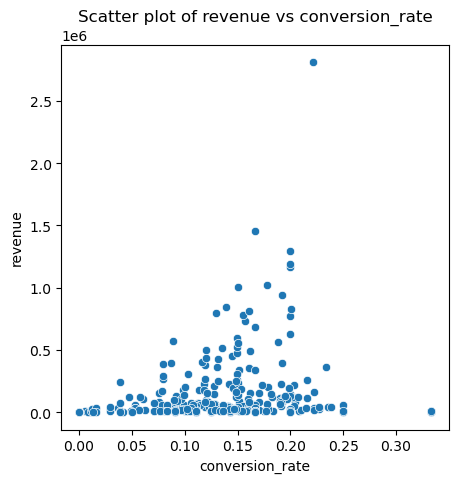

In [32]:
# Plotting scatter plots for each numerical column against 'revenue' to visualize their relationships
for col in num.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of revenue vs ' + col)
    sns.scatterplot(data=df, x=col, y='revenue')
    plt.show()

#### Hypothesis 1
**Null hypothesis (H0)**: The mean profitability is the same across all categories

**Alternative hypothesis (H1)**:At least one category has a significantly different mean profitability

In [34]:
# define samples of profit and loss
profit = df[df['profit_or_loss'] > 0] 
loss = df[df['profit_or_loss'] <= 0] 

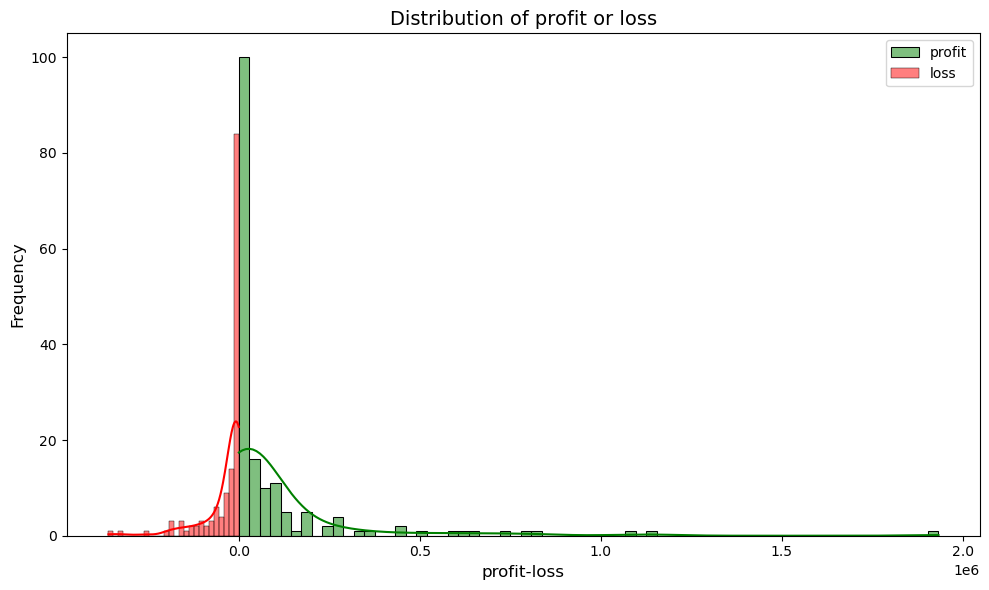

In [35]:
#Plot the distribution of profit and loss to check the normality of data
plt.figure(figsize=(10, 6))  
sns.histplot(profit['profit_or_loss'], color="green", kde=True, label='profit')
sns.histplot(loss['profit_or_loss'], color="red", kde=True, label='loss')

plt.title("Distribution of profit or loss", fontsize=14)
plt.xlabel("profit-loss", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(False)
plt.tight_layout()  
plt.show()

Category: social, Shapiro-Wilk Test Statistic: 0.7086522175, P-Value: 0.0000000000
Category 'social' not a normal distribution.
Category: search, Shapiro-Wilk Test Statistic: 0.8715876545, P-Value: 0.0000252592
Category 'search' not a normal distribution.
Category: influencer, Shapiro-Wilk Test Statistic: 0.6502038820, P-Value: 0.0000000003
Category 'influencer' not a normal distribution.
Category: media, Shapiro-Wilk Test Statistic: 0.6261202625, P-Value: 0.0000003010
Category 'media' not a normal distribution.


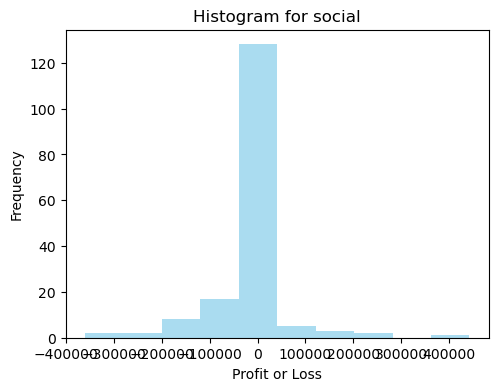

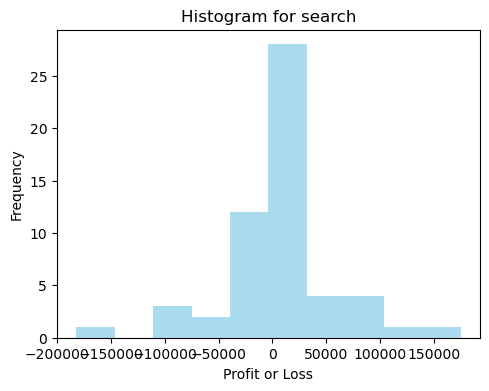

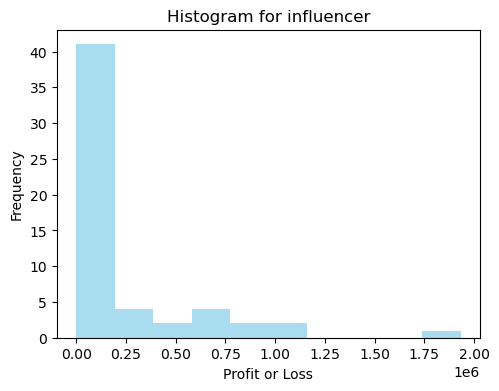

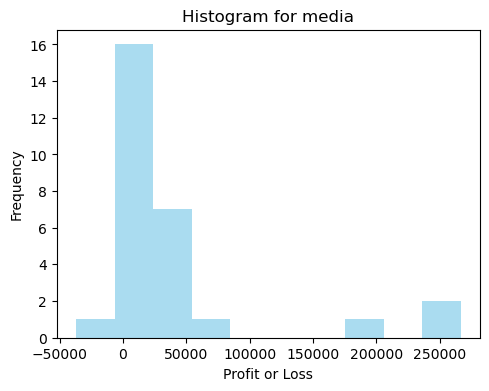

In [36]:
#Shapiro test to check the normality of distribution of profit-loss within each category
from scipy.stats import shapiro
import scipy.stats as stats

# define categories
categories = df['category'].unique()

alpha = 0.05

# make a for loop to go through each category
for category in categories:
    group_category = df[df['category'] == category]['profit_or_loss']
    
    # perform Shapiro-Wilk test
    stat, p_value = shapiro(group_category)
    print(f"Category: {category}, Shapiro-Wilk Test Statistic: {stat:.10f}, P-Value: {p_value:.10f}")
    
    # Decision making
    if p_value < alpha:
        print(f"Category '{category}' not a normal distribution.")
    else:
        print(f"Category '{category}' a normal distribution.")

    # plot histogram
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(group_category, bins=10, color='skyblue', alpha=0.7)
    plt.title(f"Histogram for {category}")
    plt.xlabel('Profit or Loss')
    plt.ylabel('Frequency')


In [37]:
# Non parametric Anova test for Profit_loss and category (as profit_loss is not normally distributed, use Kruskal-Wallis Test)
from scipy.stats import kruskal

#create groups of category
social = df[df['category'] == 'social']['profit_or_loss']
influencer = df[df['category'] == 'influencer']['profit_or_loss']
search = df[df['category'] == 'search']['profit_or_loss']
media = df[df['category'] == 'media']['profit_or_loss']

# Kruskal-Wallis Test
stat, p_value = kruskal(social, influencer, search, media)
print(f"Kruskal-Wallis Statistic: {stat:.4f}")
print(f"P-Value: {p_value:.25f}")

alpha = 0.05
# Decision making
if p_value > alpha:
    print("Fail to Reject the Null Hypothesis: category has no significant impact on profitability.")
else:
    print("Reject the Null Hypothesis: category has significant impact on profitability.")


Kruskal-Wallis Statistic: 105.0553
P-Value: 0.0000000000000000000001271
Reject the Null Hypothesis: category has significant impact on profitability.


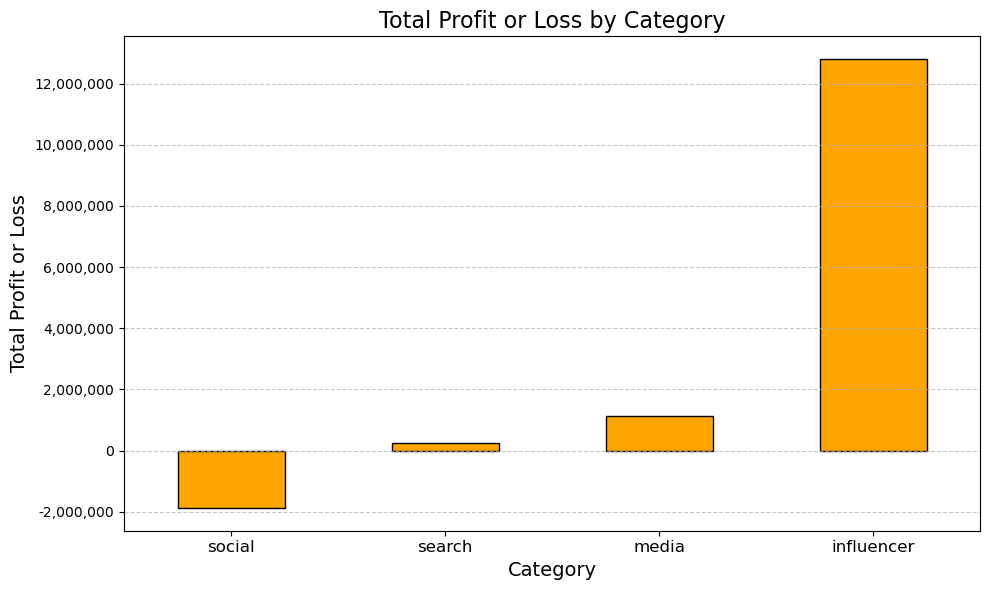

In [38]:
# BarPlot total profit_or_loss per Category to check the profitibility category significance
profit_cat = df.groupby('category')['profit_or_loss'].sum().sort_values()

plt.figure(figsize=(10, 6))
profit_cat.plot(kind='bar', color='orange', edgecolor='black')

#expand y axis to have full number
ax = plt.gca()  # Get the current axes
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))  # Add commas for thousands

# customize chart lable
plt.title('Total Profit or Loss by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Profit or Loss', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### Hypothesis 2
**Null hypothesis (H0)**: The mean of number of leads generated through campaigns is equal the number of orders placed.

**Alternative hypothesis (H1)**: The mean of number of leads generated through campaigns is significantly different from the number of orders placed

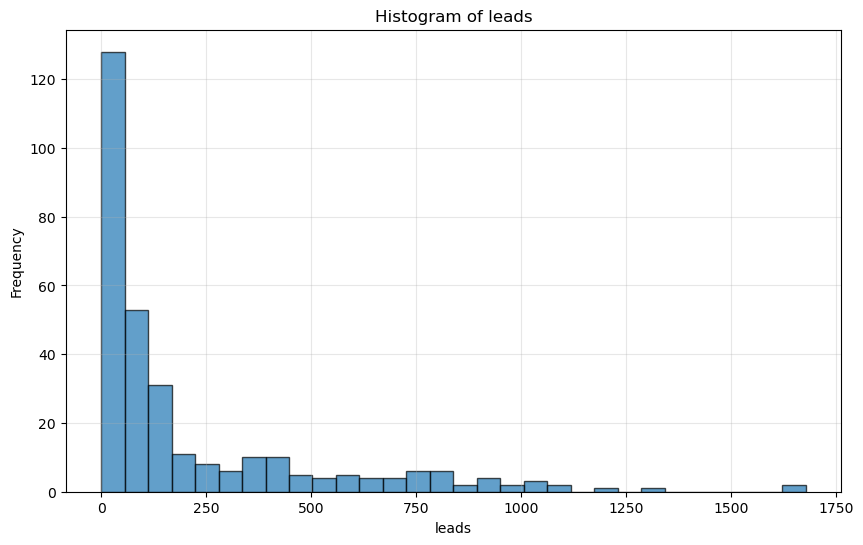

In [40]:
#Plot the Histogram of dirstribution of the leads to check the normality
plt.figure(figsize=(10, 6))
plt.hist(df['leads'], bins=30, edgecolor="black", alpha=0.7)
plt.title("Histogram of leads")
plt.xlabel("leads")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

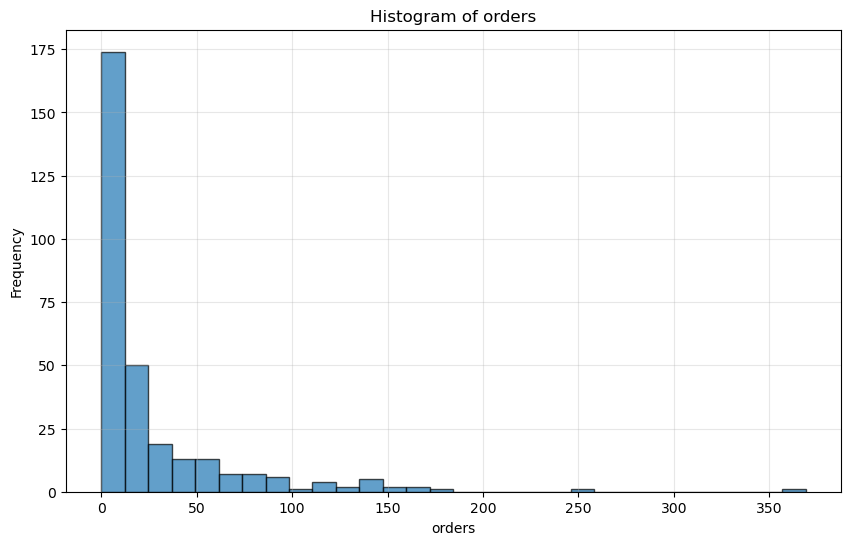

In [41]:
#Plot the Histogram of dirstribution of the orders to check the normality
plt.figure(figsize=(10, 6))
plt.hist(df['orders'], bins=30, edgecolor="black", alpha=0.7)
plt.title("Histogram of orders")
plt.xlabel("orders")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

In [42]:
# Perform paired ttest for leads and orders 
# lead and order is not normally distributed perform Wilcoxon Signed-Rank Test
#defining the samples
leads=df["leads"]
orders=df["orders"]

# Perform the Wilcoxon Signed-Rank Test for non parametric distibution, two sided t test 
statistic, p_value = stats.wilcoxon(leads, orders, alternative='two-sided')

# results
print(f"Wilcoxon Signed-Rank Test Statistic: {statistic:.4f}")
print(f"P-Value: {p_value:.60f}")
print()

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis (H0): There is a significant difference between the paired samples of leads and orders.")
else:
    print("Fail to reject the null hypothesis (H0): There is no significant difference between the paired samples of leads and orders.")

Wilcoxon Signed-Rank Test Statistic: 0.0000
P-Value: 0.000000000000000000000000000000000000000000000000001344203846

Reject the null hypothesis (H0): There is a significant difference between the paired samples of leads and orders.


In [43]:
# Calculate Cohen's d to see the magnitute
# Calculate the differences
differences = leads - orders

# Calculate Cohen's d
mean_diff_amount = differences.mean()
std_diff_amount = differences.std(ddof=1) 
cohens_d_amount = mean_diff_amount / std_diff_amount
print(f"Cohen's d: {cohens_d_amount:.2f}")

# Interpret Cohen's d
if abs(cohens_d_amount) < 0.2:
    print("The effect size is small.")
elif abs(cohens_d_amount) < 0.5:
    print("The effect size is medium.")
else:
    print("The effect size is large.")

Cohen's d: 0.71
The effect size is large.


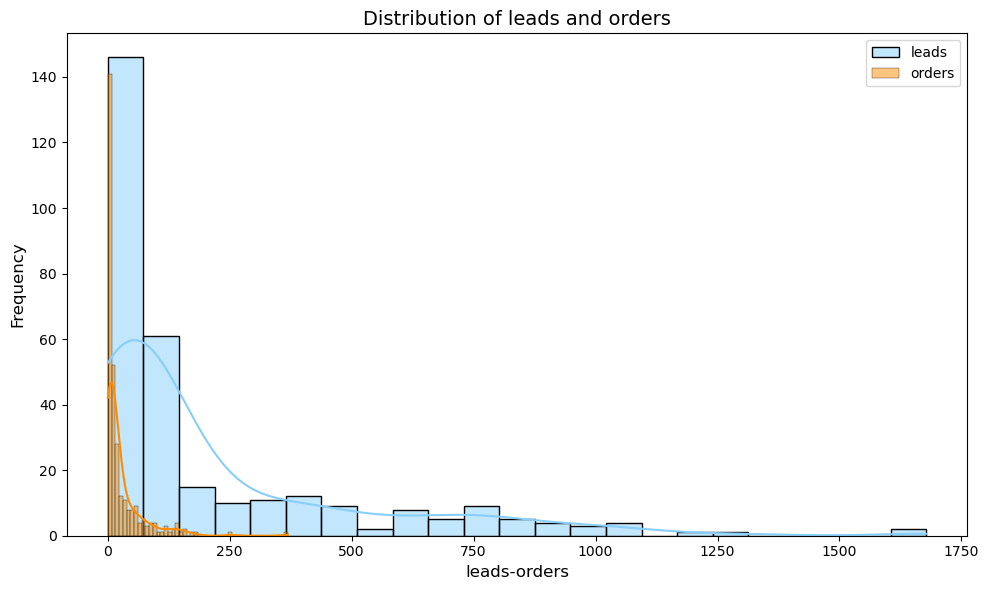

In [44]:
# Plot the distributions leads and orders
plt.figure(figsize=(10, 6))  
sns.histplot(df["leads"], color="lightskyblue", kde=True, label='leads')
sns.histplot(df["orders"], color="darkorange", kde=True, label='orders')

plt.title("Distribution of leads and orders", fontsize=14)
plt.xlabel("leads-orders", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(False)
plt.tight_layout()  
plt.show()